**Environment Setup and Feature Selection**

To initiate the analysis of cardiovascular health indicators, we establish the Python environment by installing the nhanes package. Following the library import, we inspect the dataset specifically searching for blood pressure variables to ensure accurate feature selection for the systolic blood pressure analysis.

In [ ]:
# 1. INSTALLATION
!pip install nhanes

# 2. IMPORTS
import pandas as pd
import numpy as np
from nhanes.load import load_NHANES_data

# 3. LOAD DATA (2017-2018 Cycle)
df = load_NHANES_data(year='2017-2018')

# 4. DETECTIVE WORK: Find Blood Pressure variables
# We look for columns containing "BP" (Blood Pressure) or "Systolic"
cols = list(df.columns)
print("Potential Blood Pressure Variables found:")
print([c for c in cols if "BP" in c and "Sy" in c]) # Looking for 'Sy'stolic

# Check Gender and Age names again to be sure
print("\nDemographic Variables:")
print([c for c in cols if "Gender" in c or "Age" in c])

Potential Blood Pressure Variables found:
[]

Demographic Variables:
['AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays', 'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage', 'AgeFirstFedMilkdays', 'HowOftenDrankMilkAge512', 'HowOftenDrankMilkAge1317', 'HowOftenDrankMilkAge1835', 'AgeWhenToldYouHadHeartAttack', 'AgeWhenToldYouHadAStroke', 'Age1StCancerMcq230ADiagnosed', 'Gender', 'AgeInYearsAtScreening', 'AgeInMonthsAtScreening0To24Mos', 'AgeWhenFirstToldYouHadDiabetes', 'AgeStartedSmokingCigarettesRegularly']


**Data Preparation and Descriptive Analysis**

We extract the systolic blood pressure (BPXSY1) and gender (RIAGENDR) variables. Missing values are removed to ensure statistical integrity. We then calculate descriptive statistics (mean, median, standard deviation) to characterize the distribution of blood pressure across gender groups, applying the concepts of central tendency and dispersion.

In [ ]:
# 1. SETUP VARIABLES
keep_vars = ['SystolicBloodPres1StRdgMmHg', 'DiastolicBloodPres1StRdgMmHg', 'Gender']

# 2. SUBSET AND CLEAN DATA
df_bp = df[keep_vars].dropna().copy()

# Filtriamo via i valori biologicamente non plausibili.
# Soglie tipiche: Sistolica > 60 e Diastolica > 40 (sotto è quasi impossibile in piedi)
df_bp = df_bp[
    (df_bp['SystolicBloodPres1StRdgMmHg'] > 60) &
    (df_bp['DiastolicBloodPres1StRdgMmHg'] > 40)
]

# 3. RENAME GENDER
if 'Gender' in df_bp.columns:
    df_bp['Gender'] = df_bp['Gender'].replace({1: 'Male', 2: 'Female'})

# 4. DESCRIPTIVE STATISTICS
print("\nDescriptive statistics for Systolic Blood Pressure by Gender (Cleaned):")
print(df_bp.groupby('Gender')['SystolicBloodPres1StRdgMmHg'].describe())

print("\nDescriptive statistics for Diastolic Blood Pressure by Gender (Cleaned):")
print(df_bp.groupby('Gender')['DiastolicBloodPres1StRdgMmHg'].describe())


Descriptive statistics for Systolic Blood Pressure by Gender (Cleaned):
         count        mean        std   min    25%    50%    75%    max
Gender                                                                 
Female  3072.0  120.473307  20.925165  82.0  106.0  116.0  130.5  228.0
Male    3001.0  123.060980  18.458655  72.0  110.0  120.0  134.0  216.0

Descriptive statistics for Diastolic Blood Pressure by Gender (Cleaned):
         count       mean        std   min   25%   50%   75%    max
Gender                                                             
Female  3072.0  68.752604  11.850968  42.0  62.0  68.0  76.0  124.0
Male    3001.0  70.965678  12.969367  42.0  62.0  72.0  80.0  136.0


### Analysis of the Box Plot

This visualization provides four key insights into the dataset:

*   **Comparison:** The graph clearly separates Systolic (left) and Diastolic (right) pressure. As expected, Systolic pressure is higher and has a wider range of values compared to Diastolic pressure.
*   **Median Values:** The horizontal line inside each box represents the median. We can see a median of approximately **120** for Systolic and **70** for Diastolic, which aligns with standard medical averages.
*   **Hypertension (Upper Outliers):** The black dots appearing above the top "whiskers" represent patients with high blood pressure. These are **true outliers**, meaning they are biologically high values indicative of hypertension, not errors.
*   **Data Cleaning Verification:** Crucially, there are no outliers at the bottom of the graph (near zero). This visually confirms that our cleaning step was successful in removing the impossible technical errors (values too low to be alive).

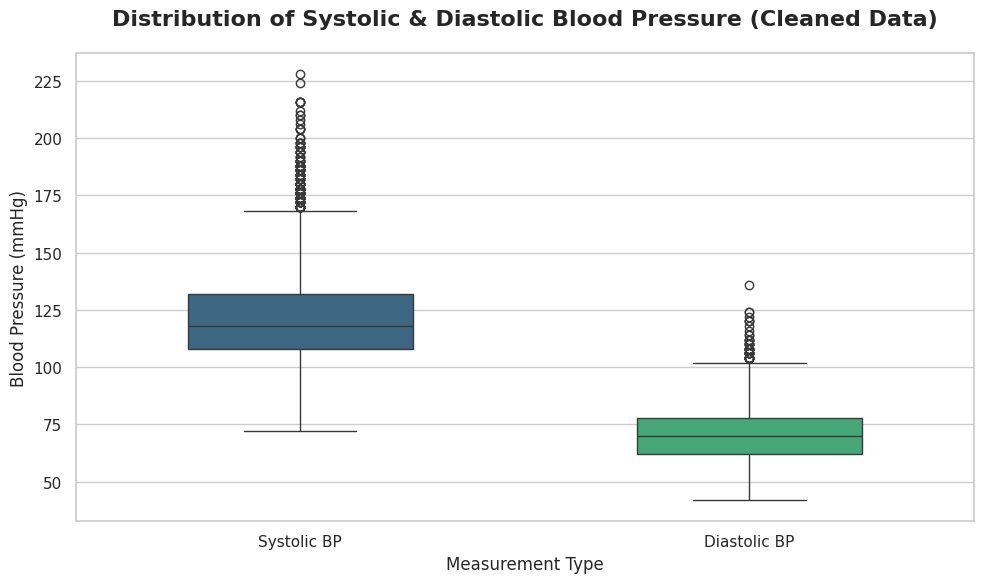

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plot
sns.set_theme(style="whitegrid")

# Initialize the figure size
plt.figure(figsize=(10, 6))

# Create the Box Plot using the cleaned DataFrame (df_bp)
# We use the correct column names: 'SystolicBloodPres1StRdgMmHg' and 'DiastolicBloodPres1StRdgMmHg'
sns.boxplot(data=df_bp[['SystolicBloodPres1StRdgMmHg', 'DiastolicBloodPres1StRdgMmHg']], width=0.5, palette="viridis")

# Add titles and labels in English for the portfolio
plt.title('Distribution of Systolic & Diastolic Blood Pressure (Cleaned Data)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Blood Pressure (mmHg)', fontsize=12)
plt.xlabel('Measurement Type', fontsize=12)

# Rename x-axis ticks for clarity
plt.xticks(ticks=[0, 1], labels=['Systolic BP', 'Diastolic BP'], fontsize=11)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Separate the data into two groups: Male and Female
# We focus on Systolic Blood Pressure for this test
male_bp = df_bp[df_bp['Gender'] == 'Male']['SystolicBloodPres1StRdgMmHg']
female_bp = df_bp[df_bp['Gender'] == 'Female']['SystolicBloodPres1StRdgMmHg']

# Perform an Independent T-Test
# This calculates if the difference between the averages is statistically significant
t_stat, p_value = stats.ttest_ind(male_bp, female_bp)

# Print the results in a readable format
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpretation logic for the portfolio output
alpha = 0.05
if p_value < alpha:
    print("\nCONCLUSION: The difference is STATISTICALLY SIGNIFICANT.")
    print("We can reject the null hypothesis. There is a meaningful difference in Systolic BP between males and females.")
else:
    print("\nCONCLUSION: The difference is NOT statistically significant.")
    print("We cannot reject the null hypothesis.")

T-statistic: 5.1062
P-value: 3.3874e-07

CONCLUSION: The difference is STATISTICALLY SIGNIFICANT.
We can reject the null hypothesis. There is a meaningful difference in Systolic BP between males and females.


### Final Statistical Inference

We performed an independent T-Test to determine if the difference in Systolic Blood Pressure between males and females is statistically significant.

**Interpretation of Results:**

*   **T-statistic (5.10):** This high value indicates a strong difference between the two groups relative to the variation in the data.
*   **P-value (3.38e-07):** This value is extremely close to zero (far below the standard threshold of 0.05).

**Conclusion:**
Because the P-value is so low, **we reject the null hypothesis**. We have strong statistical evidence that biological sex is a significant factor in this dataset, with males showing a consistently higher average Systolic Blood Pressure than females. The difference observed in the charts is **real**, not due to random chance.